In [5]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict,Counter
from random import sample
from sklearn import datasets
import NeuralNet as nn

## Hand-Written Digits Dataset

**Models Used:**
- Neural Networks
- KNN

### 1. Neural Network

In [2]:
digits = datasets.load_digits(as_frame=True)
dig_df = digits['data']
dig_df['class'] = digits['target']
dig_df.insert(0,'bias',1)

#split data by class into k groups the combine into folds
k = 10
dig_class_0 = dig_df.loc[dig_df['class'] == 0].sample(frac=1)
dig_class_0['class'] = [[1,0,0,0,0,0,0,0,0,0]] * len(dig_class_0)
dg0_split =  np.array_split(dig_class_0,k)
dig_class_1 = dig_df.loc[dig_df['class'] == 1].sample(frac=1)
dig_class_1['class'] = [[0,1,0,0,0,0,0,0,0,0]] * len(dig_class_1)
dg1_split =  np.array_split(dig_class_1,k)
dig_class_2 = dig_df.loc[dig_df['class'] == 2].sample(frac=1)
dig_class_2['class'] = [[0,0,1,0,0,0,0,0,0,0]] * len(dig_class_2)
dg2_split =  np.array_split(dig_class_2,k)
dig_class_3 = dig_df.loc[dig_df['class'] == 3].sample(frac=1)
dig_class_3['class'] = [[0,0,0,1,0,0,0,0,0,0]] * len(dig_class_3)
dg3_split =  np.array_split(dig_class_3,k)
dig_class_4 = dig_df.loc[dig_df['class'] == 4].sample(frac=1)
dig_class_4['class'] = [[0,0,0,0,1,0,0,0,0,0]] * len(dig_class_4)
dg4_split =  np.array_split(dig_class_4,k)
dig_class_5 = dig_df.loc[dig_df['class'] == 5].sample(frac=1)
dig_class_5['class'] = [[0,0,0,0,0,1,0,0,0,0]] * len(dig_class_5)
dg5_split =  np.array_split(dig_class_5,k)
dig_class_6 = dig_df.loc[dig_df['class'] == 6].sample(frac=1)
dig_class_6['class'] = [[0,0,0,0,0,0,1,0,0,0]] * len(dig_class_6)
dg6_split =  np.array_split(dig_class_6,k)
dig_class_7 = dig_df.loc[dig_df['class'] == 7].sample(frac=1)
dig_class_7['class'] = [[0,0,0,0,0,0,0,1,0,0]] * len(dig_class_7)
dg7_split =  np.array_split(dig_class_7,k)
dig_class_8 = dig_df.loc[dig_df['class'] == 8].sample(frac=1)
dig_class_8['class'] = [[0,0,0,0,0,0,0,0,1,0]] * len(dig_class_8)
dg8_split =  np.array_split(dig_class_8,k)
dig_class_9 = dig_df.loc[dig_df['class'] == 9].sample(frac=1)
dig_class_9['class'] = [[0,0,0,0,0,0,0,0,0,1]] * len(dig_class_9)
dg9_split =  np.array_split(dig_class_9,k)
dig_vals = [[1,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,1]]

#list to hold folds
dig_fold = []
for i in range(k):
    this_fold = [dg0_split[i],dg1_split[i],dg2_split[i],dg3_split[i],dg4_split[i],dg5_split[i],dg6_split[i],dg7_split[i],dg8_split[i],dg9_split[i]]
    dig_fold.append(pd.concat(this_fold))

#dig_nn_arc = [[64,64,10],[64,128,10],[64,64,128,10],[64,32,64,10],[64,64,32,64,10],[64,64,128,128,64,10]]
dig_nn_arc = [[64,64,10],[64,128,10]]

def dig_test(lamb,eps,alpha,batch_size):
    dig_res = nn.k_fold(dig_fold,dig_vals,dig_nn_arc,lamb,eps,alpha,batch_size)
    arc_dict = defaultdict(list)
    print(f'lamb = {lamb} eps = {eps} alpha = {alpha} batch_size = {batch_size}')

    for arc,perf in dig_res.items():
        avg_acc,avg_f1 = [0,0]
        for res in perf:
            avg_acc += res[0]
            avg_f1 += res[1]
        arc_dict['Architecture'].append(arc)
        arc_dict['Accuracy'].append(avg_acc/10)
        arc_dict['F1'].append(avg_f1/10)

    arc_table = pd.DataFrame(arc_dict)
    print(arc_table)

**1.3** To obtain the best performance possible, you should carefully adjust the hyper-parameters of each
algorithm when deployed on a dataset

In [27]:
hyper_params = [[0.4,0.01,5,50],[0.6,0.01,5,50],[0.4,0.001,5,50],[0.6,0.001,5,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.4 eps = 0.01 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.955459  0.955166
1  [64, 128, 10]  0.958234  0.957735
lamb = 0.6 eps = 0.01 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.958786  0.959035
1  [64, 128, 10]  0.964924  0.964825
lamb = 0.4 eps = 0.001 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.964949  0.965058
1  [64, 128, 10]  0.967716  0.967639
lamb = 0.6 eps = 0.001 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.964918  0.964842
1  [64, 128, 10]  0.968833  0.968655


In [28]:
dig_nn_arc = [[64,64,10],[64,128,10],[64,64,128,10],[64,32,64,10]]
hyper_params = [[0.2,0.001,5,50],[0.4,0.001,5,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.2 eps = 0.001 alpha = 5 batch_size = 50
        Architecture  Accuracy        F1
0       [64, 64, 10]  0.965455  0.965219
1      [64, 128, 10]  0.972150  0.972106
2  [64, 64, 128, 10]  0.962743  0.962414
3   [64, 32, 64, 10]  0.946058  0.945727
lamb = 0.4 eps = 0.001 alpha = 5 batch_size = 50
        Architecture  Accuracy        F1
0       [64, 64, 10]  0.957652  0.957369
1      [64, 128, 10]  0.972685  0.972667
2  [64, 64, 128, 10]  0.959403  0.959354
3   [64, 32, 64, 10]  0.945982  0.945710


In [3]:
dig_nn_arc = [[64,128,10],[64,128,128,10]]
hyper_params = [[0.2,0.0001,7,50],[0.2,0.0001,10,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.2 eps = 0.0001 alpha = 7 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.966064  0.965883
1  [64, 128, 128, 10]  0.972193  0.972465
lamb = 0.2 eps = 0.0001 alpha = 10 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.966079  0.965760
1  [64, 128, 128, 10]  0.961644  0.961582


In [31]:
dig_nn_arc = [[64,64,10],[64,128,10],[64,128,128,10],[64,64,128,64,10]]
hyper_params = [[0.2,0.0001,5,50],[0.2,0.0001,7,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.2 eps = 0.0001 alpha = 5 batch_size = 50
            Architecture  Accuracy        F1
0           [64, 64, 10]  0.959416  0.959145
1          [64, 128, 10]  0.969383  0.969181
2     [64, 128, 128, 10]  0.972754  0.972740
3  [64, 64, 128, 64, 10]  0.963294  0.963047
lamb = 0.2 eps = 0.0001 alpha = 7 batch_size = 50
            Architecture  Accuracy        F1
0           [64, 64, 10]  0.957667  0.957718
1          [64, 128, 10]  0.972792  0.972715
2     [64, 128, 128, 10]  0.970452  0.970365
3  [64, 64, 128, 64, 10]  0.962088  0.961845


In [7]:
dig_nn_arc = [[64,128,10],[64,128,128,10]]
hyper_params = [[0.4,0.001,5,50],[0.4,0.001,7,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.4 eps = 0.001 alpha = 5 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.972705  0.972602
1  [64, 128, 128, 10]  0.967140  0.967031
lamb = 0.4 eps = 0.001 alpha = 7 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.960403  0.960171
1  [64, 128, 128, 10]  0.963249  0.963181


In [143]:
dig_nn_arc = [[64,128,10]]
hyper_params = [[0.1,0.0001,7,50],[0.05,0.0001,7,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.1 eps = 0.0001 alpha = 7 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]  0.970007  0.969877
lamb = 0.05 eps = 0.0001 alpha = 7 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]   0.97151  0.971131


In [144]:
dig_nn_arc = [[64,128,10]]
hyper_params = [[0.1,0.0001,5,50],[0.05,0.0001,5,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.1 eps = 0.0001 alpha = 5 batch_size = 50
    Architecture  Accuracy       F1
0  [64, 128, 10]  0.975509  0.97539
lamb = 0.05 eps = 0.0001 alpha = 5 batch_size = 50
    Architecture  Accuracy       F1
0  [64, 128, 10]  0.963858  0.96357


In [146]:
dig_nn_arc = [[64,128,10]]
hyper_params = [[0.1,0.0001,3,50],[0.1,0.0001,5,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.1 eps = 0.0001 alpha = 3 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]  0.973884  0.973724
lamb = 0.1 eps = 0.0001 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]  0.970489  0.970409


**1.4** After analyzing the performance of each algorithm under different hyper-parameters,
identify the best hyper-parameter setting

> From testing, using lamb = 0.1 eps = 0.0001 alpha = 5 batch_size = 50 resulted in the best performance, specifically using this architecture: [64,128,10]. For all parameters, using this architecture was best, although using 2 hidden layers with 128 neurons also yielded high performance. Lambda had the highest impact on performance, decreasing accuracy for higher values of lambda.

**1.5** For each dataset, and considering the best hyper-parameter setting for each selected algorithm, construct
relevant learning curves and/or graphs

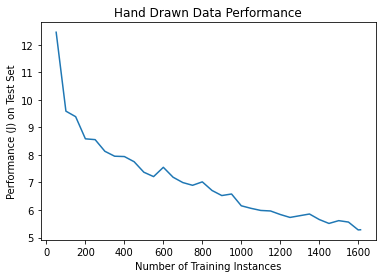

In [149]:
dig_j,dig_count = nn.k_fold(dig_fold,dig_vals,[[64,128,10]],0.1,0.0001,5,50,get_j=True)
plt.plot(dig_count,dig_j)
plt.xlabel('Number of Training Instances')
plt.ylabel('Performance (J) on Test Set')
plt.title('Hand Drawn Data Performance')
plt.show()

Briefly discuss and interpret these graphs

> This graph shows a clear downward trend in cost as the number of training instances increase, which is to be expected of neural networks.

### 2. K-NN

## Titanic Dataset

**Models Used:**
- Naive Bayes
- Decision tree

## Loan Eligibility Prediction Dataset

**Models Used:**
- Random Forests
- KNN

In [8]:
#Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
#def loan_vals_num(instance):
    #instance['Gender']
#pd.get_dummies(loan_df,columns=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'])
loan_df = pd.read_csv('loan.csv')
print(':3')


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\debugpy\_vendored\pydevd\_pydev_bundle\_pydev_imports_tipper.py:205: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  obj = getattr(obj_to_complete, d)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\debugpy\_vendored\pydevd\_pydev_bundle\_pydev_imports_tipper.py:205: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  obj = getattr(obj_to_complete, d)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\debugpy\_vendored\pydevd\_pydev_bundle\_pydev_imports_tipper.py:205: Fu

:3


## Oxford Parkingson's Disease Detection

**Models Used:**
- Neural Networks
- Random Forest